# KMeans 

steps
1. assign random centroids. must take k as a parameter and only create them within the size of the graph. must also plot them and save their locations for use later
2. iteratively assign the points to the nearest cluster. need a method to calculate distance from the point to each centroid and assign the point to whichever is the closest. replot all of these with colors for each centriod
3. solve for the new centroid using the (x,y) locations of every point assigned to that centroid. 
4. repeat 2-3 until convergence, i.e. need a way of comparing each centroid location and seeing how big the difference is. can also just specify a number of times it runs

### this is (very) messy but it works!

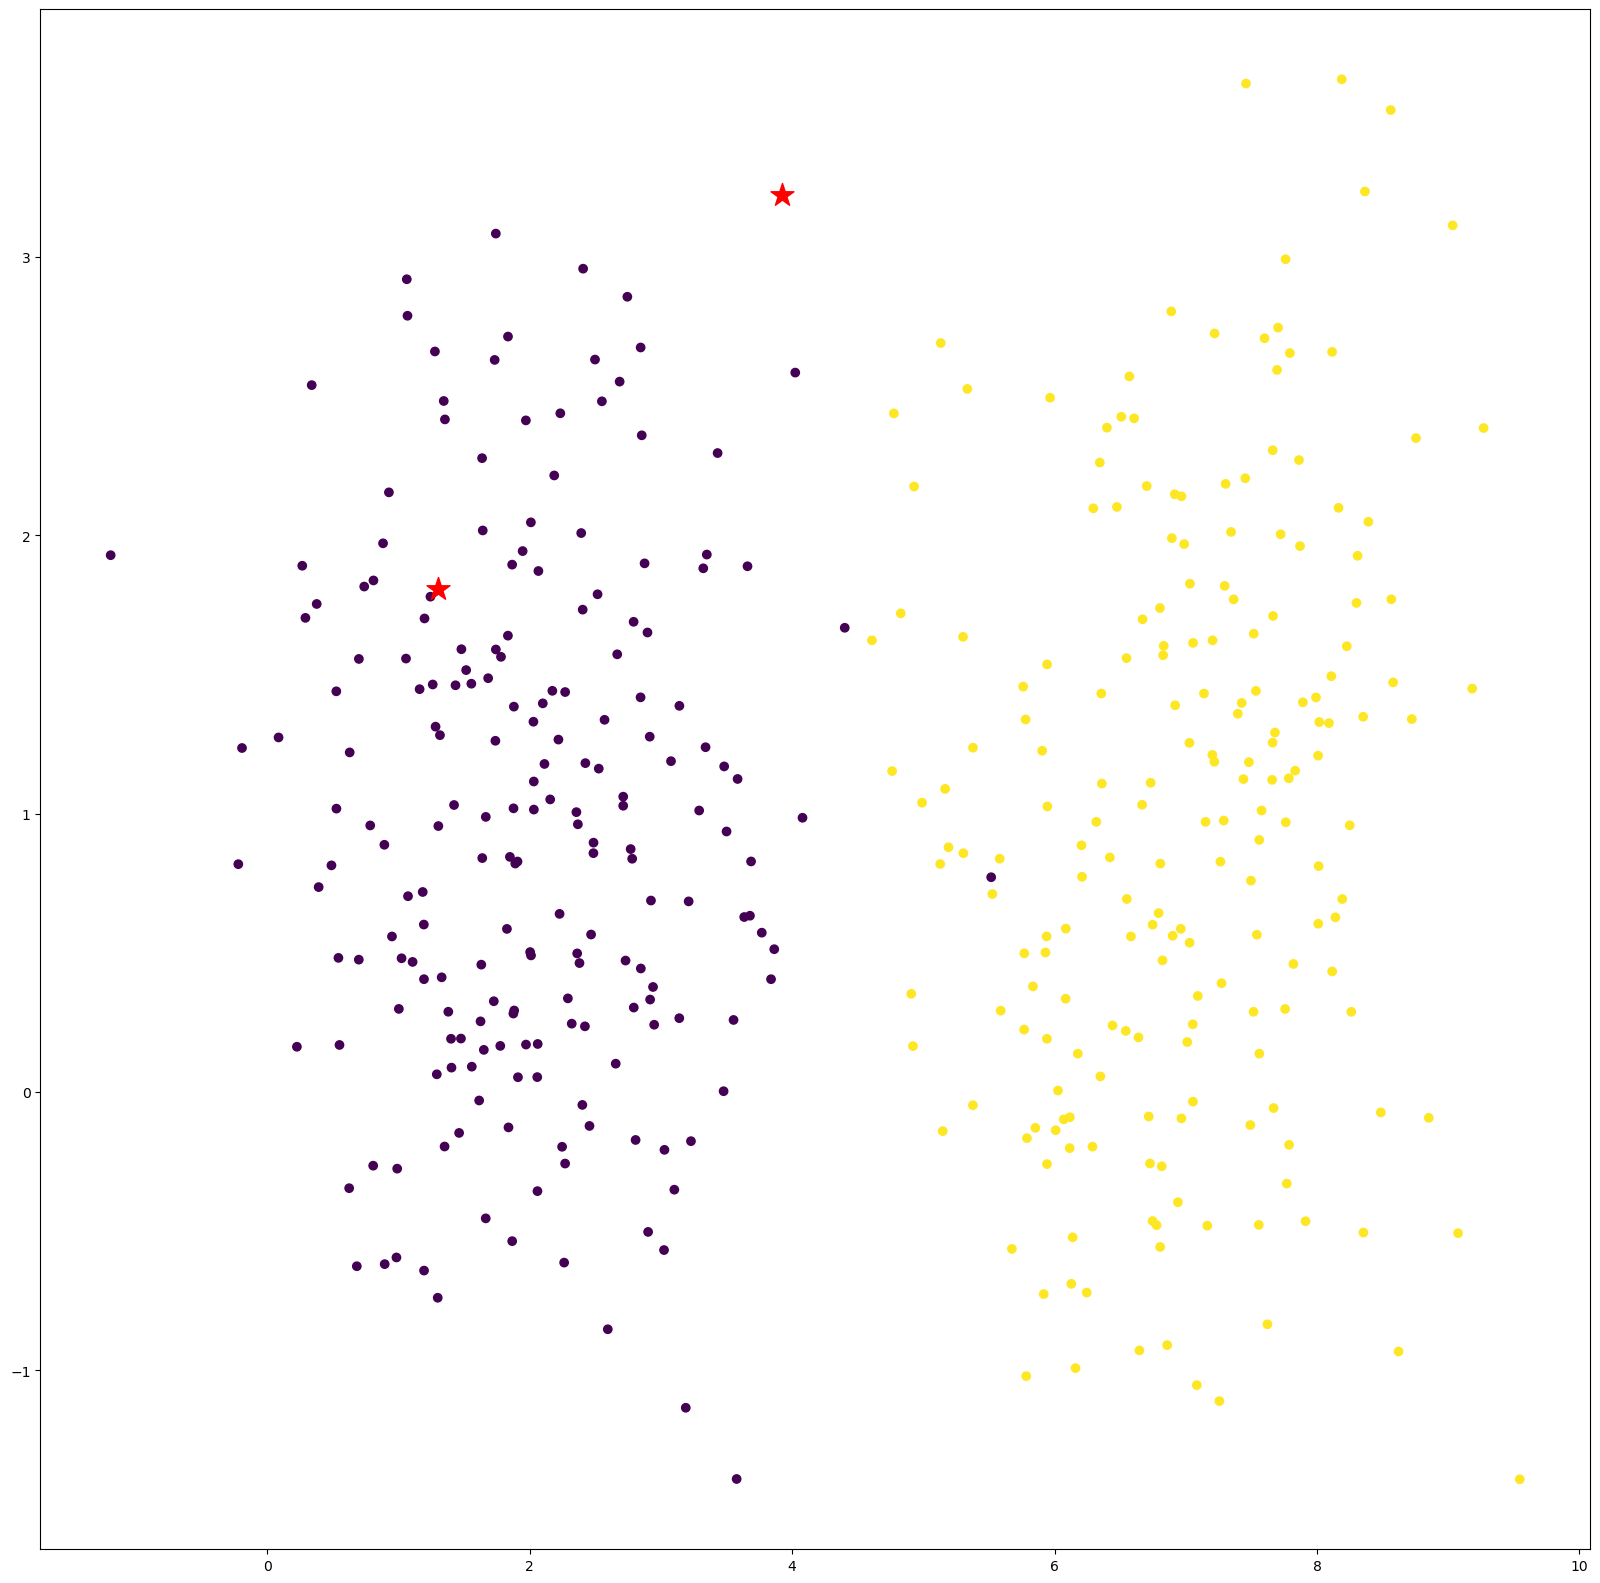

In [203]:
import numpy as np
import matplotlib.pyplot as plt

PlotSize = 20
k = 2

# Create two gaussian distributions with stddev of 1 at 2,1 and 7,1
# generates 200 samples with 2 elements each (x and y coord)
data = np.random.normal((2,1), 1, (200, 2))

# create a second cluster of datapoints with a 2nd gaussian and 
# append it to the original array of data.
# data is the array, values is a new distribution, appending to x axis
data = np.append(data, np.random.normal((7,1), 1, (200, 2)), axis=0)

# create a single dim classes array with 200 ones and 200 twos
classes = np.repeat(1, 200)
classes = np.append(classes, np.repeat(2, 200), axis = 0)

def plotData(data, color):
    # data[:,0] is all x coord values
    # c=classes means the first 200 values will be one color
    # and the next 200 values will be a diff color  
    plt.scatter(data[:,0], data[:,1], c=color)

def plotCentroids(centroids):
    centX, centY = zip(*centroids)
    plt.scatter(centX, centY, s=300, marker='*', c='r')

# initialize 
def initializeCentroids(k, xLim, yLim):
    centroids = []
    for i in range(1, k+1):
        # random.uniform generates a random float between the specified range (end exclusive)
        centX = np.random.uniform(0, xLim)
        centY = np.random.uniform(0, yLim)
        centroids.append((centX, centY))
    return centroids

# setting centroid limits
xMax = max(data[:,0])
yMax = max(data[0,:])
centroids = initializeCentroids(k, xMax, yMax)

# create a new figure
plt.figure(figsize = (PlotSize, PlotSize))
plotData(data, classes)
plotCentroids(centroids)


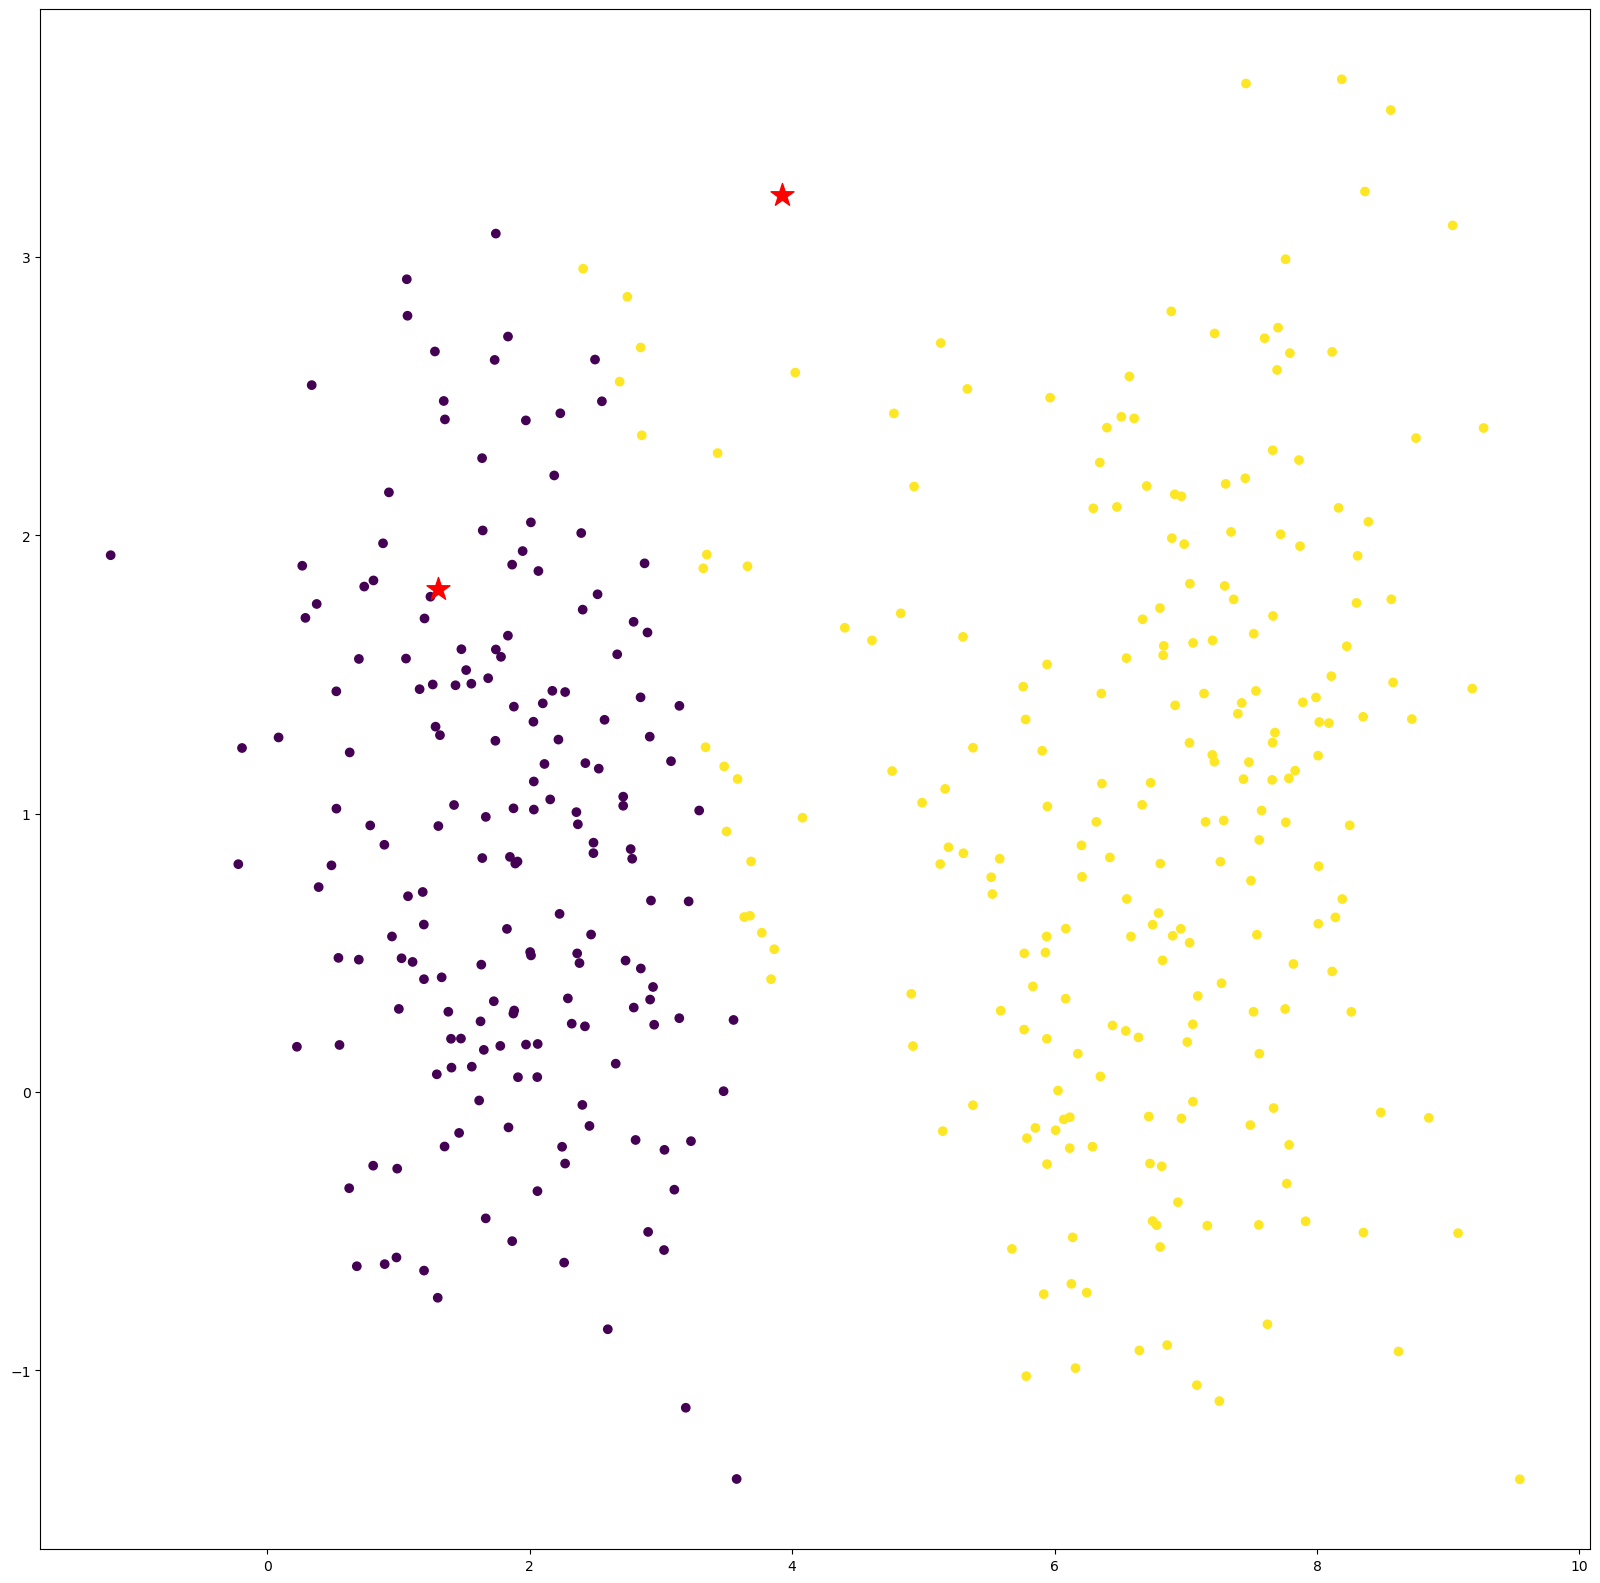

In [204]:
# SORTING CLUSTERS 1ST TIME

# find distances for each point to each centroid and return index of closest centroid
def calcDistance(point, centroids):
    distances = []
    for i in range(len(centroids)):
        dist = np.sqrt((point[0] - centroids[i][0])**2 + (point[1] - centroids[i][1])**2) 
        distances.append(dist)

    minIndex = np.argmin(distances)
    return minIndex

def sortClusters(data, centroids):
    # create a cluster array that corresponds to the data array. assign the index of 
    # the nearest centroid to clusters and replot using clusters as color
    clusters = []
    for i in range(len(data)):
        index = calcDistance(data[i], centroids)
        clusters.append(index)

    return clusters

r1Clusters = sortClusters(data, centroids)

# sorted to clusters, same centroids
plt.figure(figsize = (PlotSize, PlotSize))
plotData(data, r1Clusters)
plotCentroids(centroids)

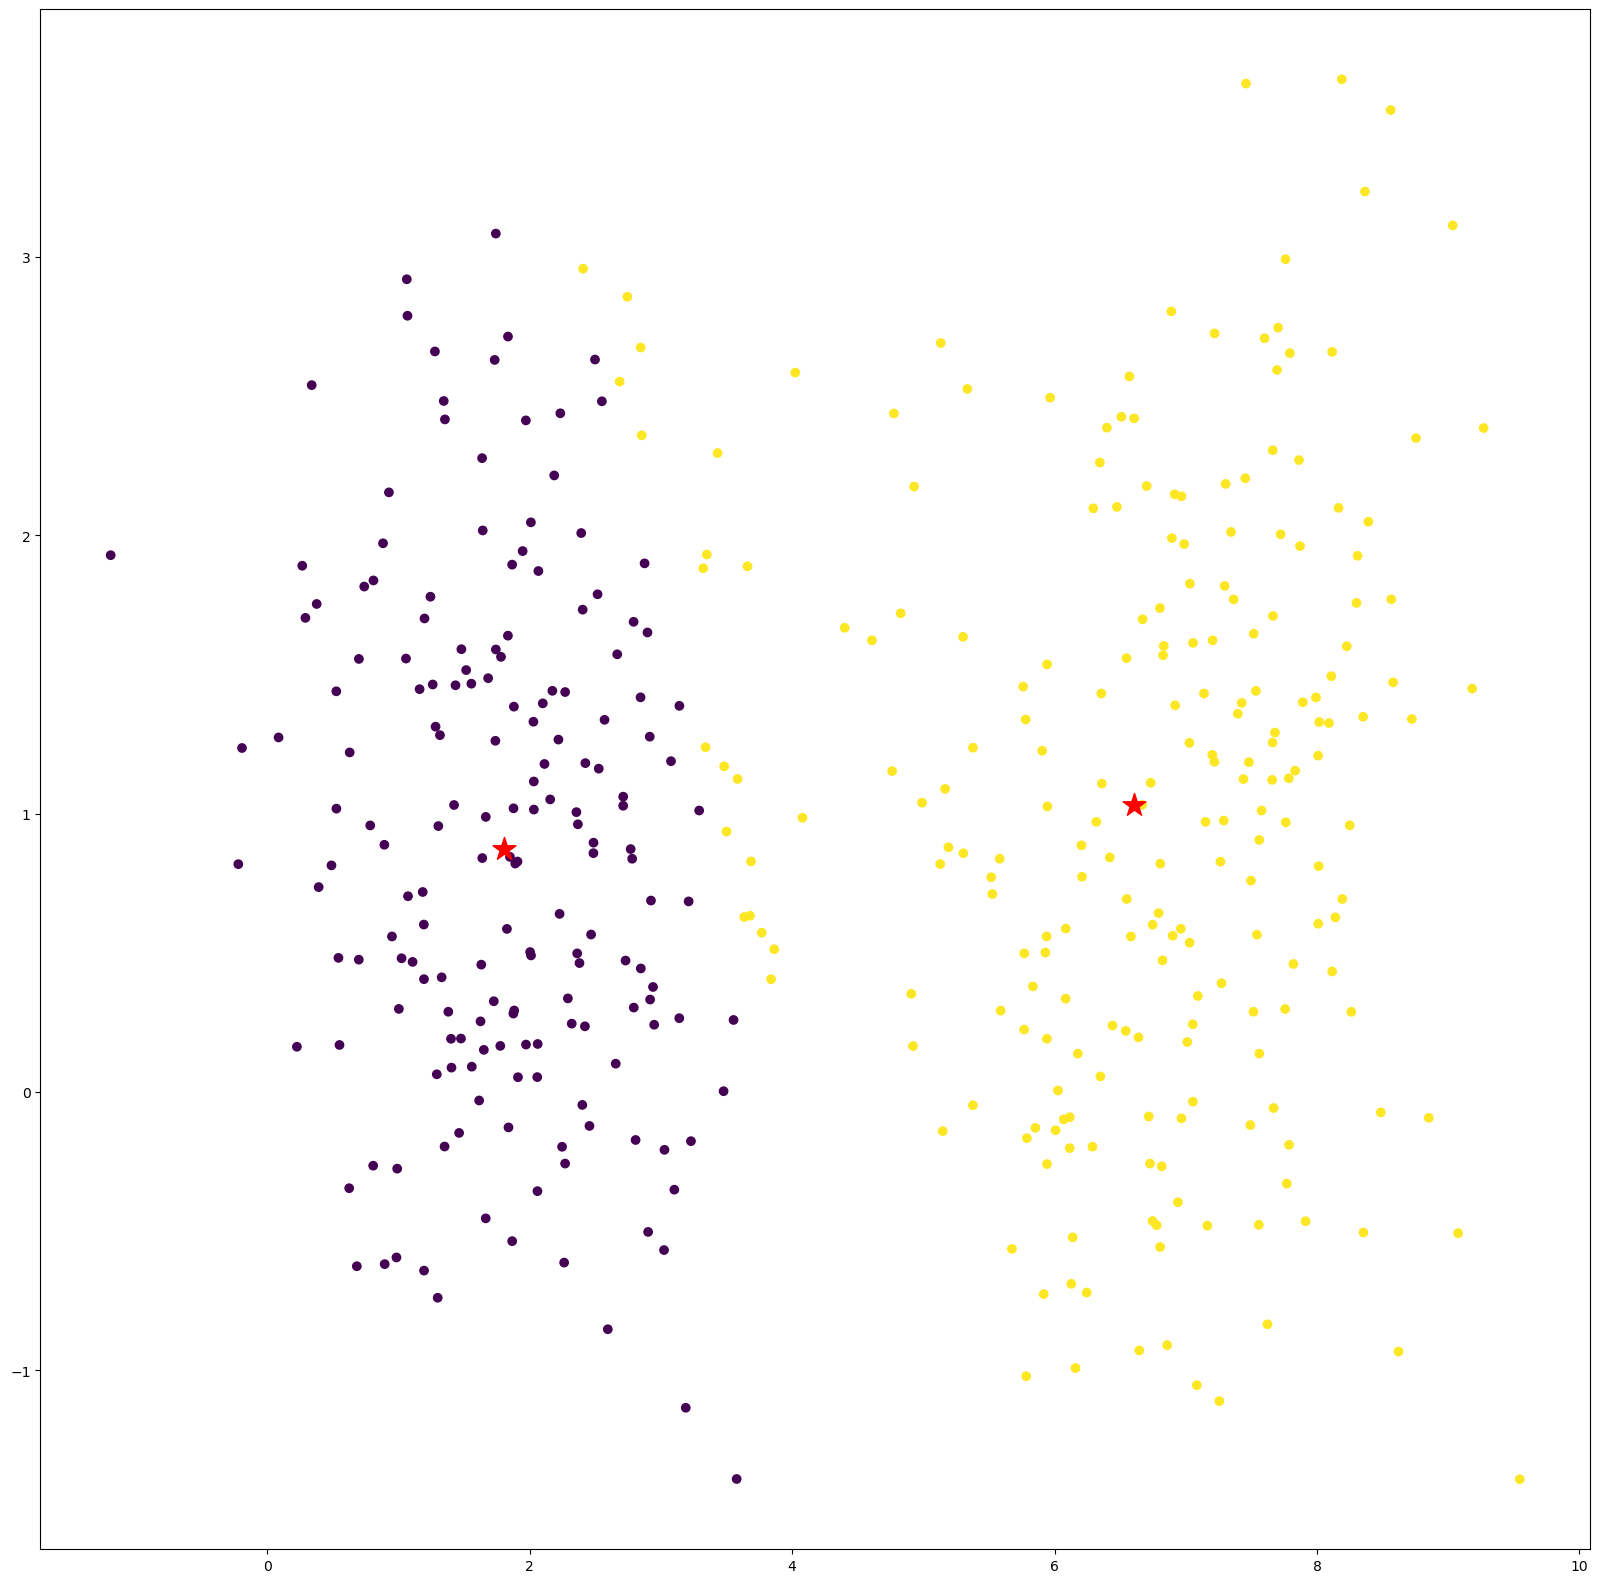

In [205]:
# REASSIGNING CENTROIDS 
def reassignCentroids(data, clusters, k):
    newCentroids = []

    for i in range(k):
        sumX = 0
        sumY = 0
        num = 0
        for j in range(len(data) - 1):
            if clusters[j] == i:
                sumX += data[j][0]
                sumY += data[j][1]
                num += 1
        new = (sumX/num, sumY/num)
        newCentroids.append(new)

    return newCentroids

r1Centroids = reassignCentroids(data, r1Clusters, k)
# sorted to clusters, same centroids
plt.figure(figsize = (PlotSize, PlotSize))
plotData(data, r1Clusters)
plotCentroids(r1Centroids)

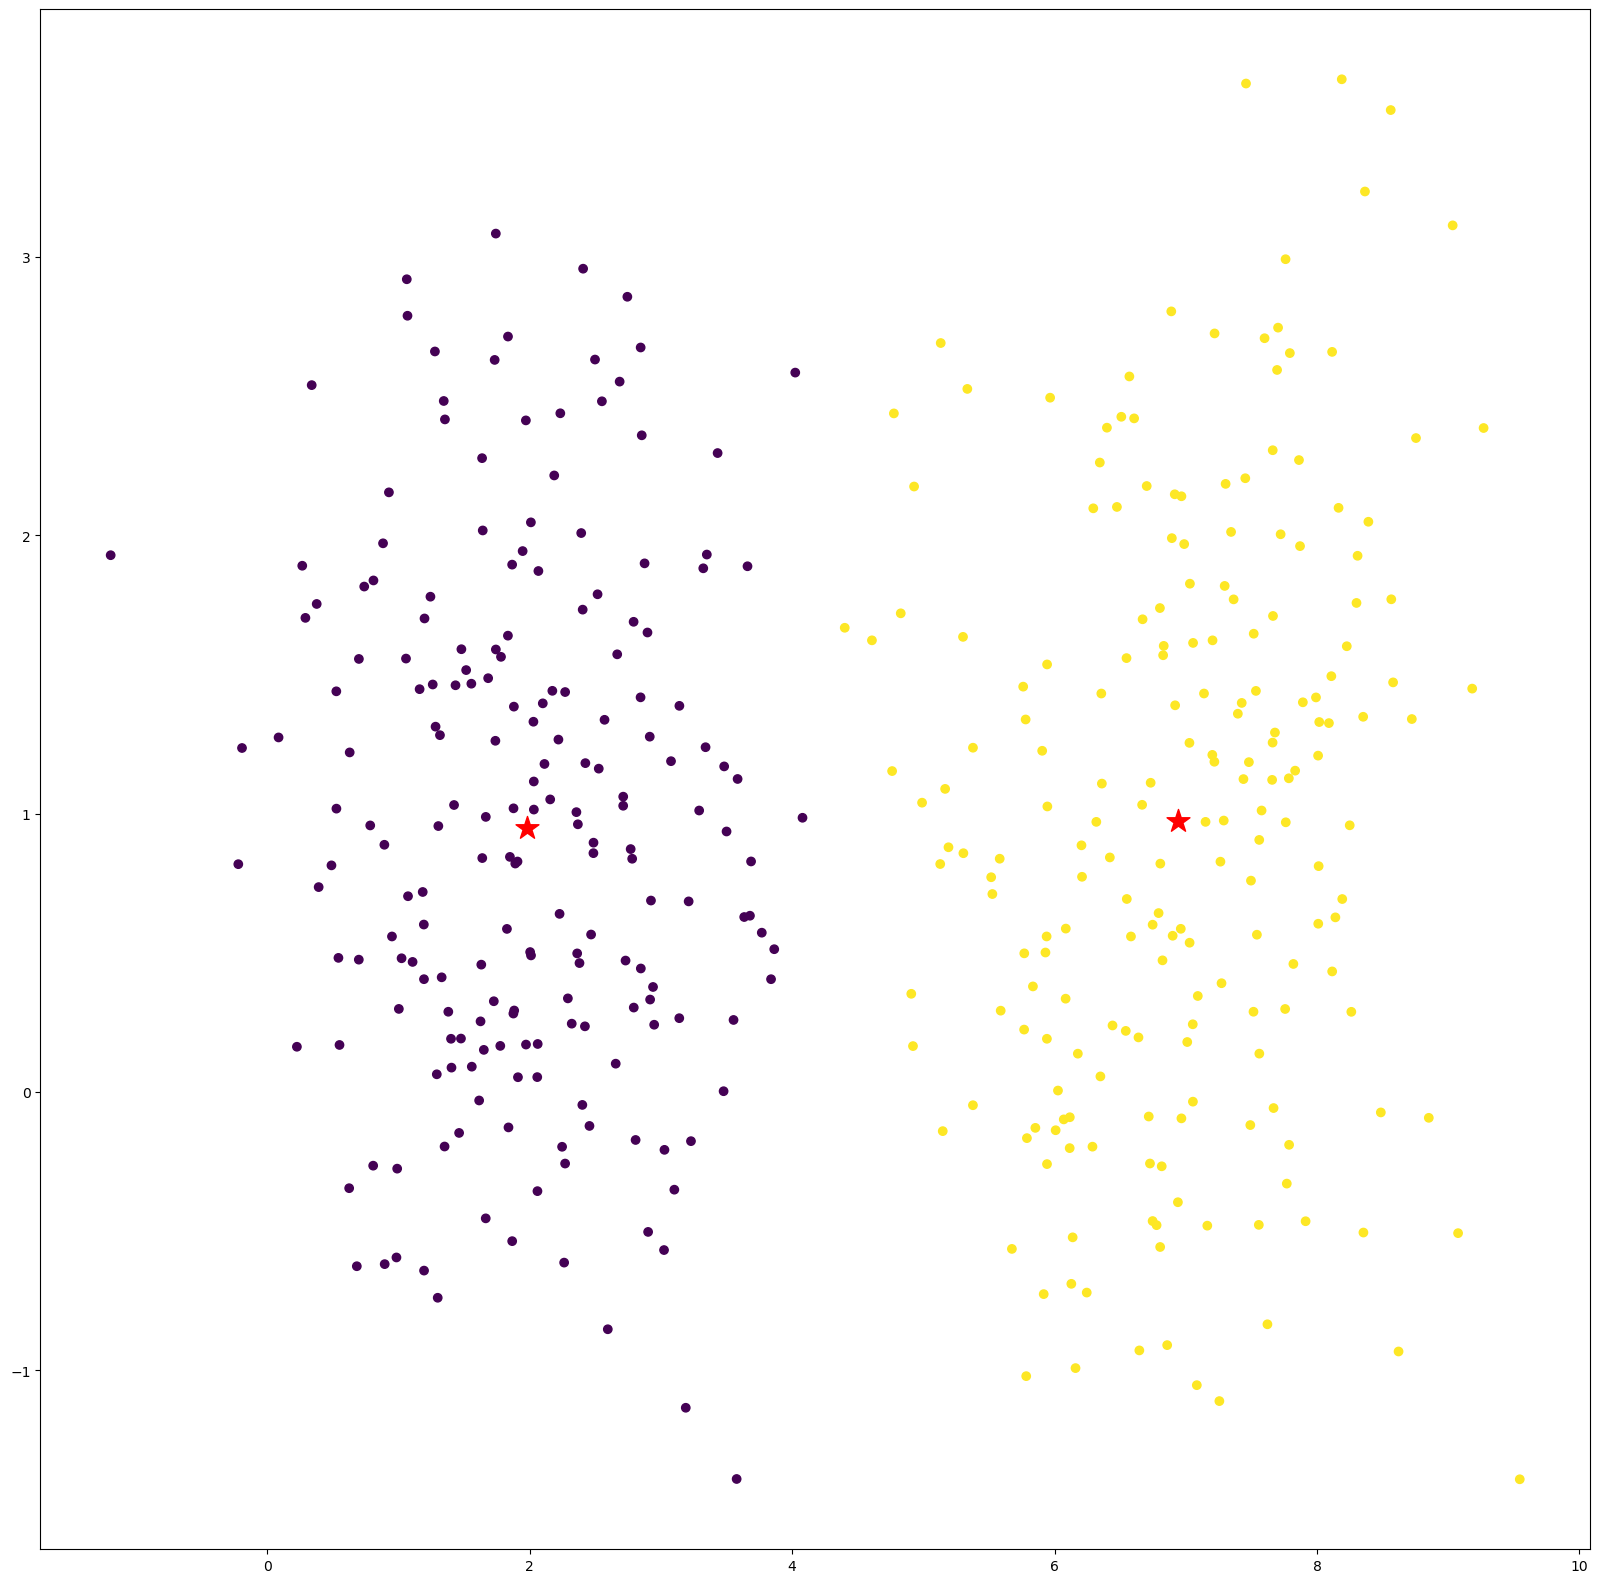

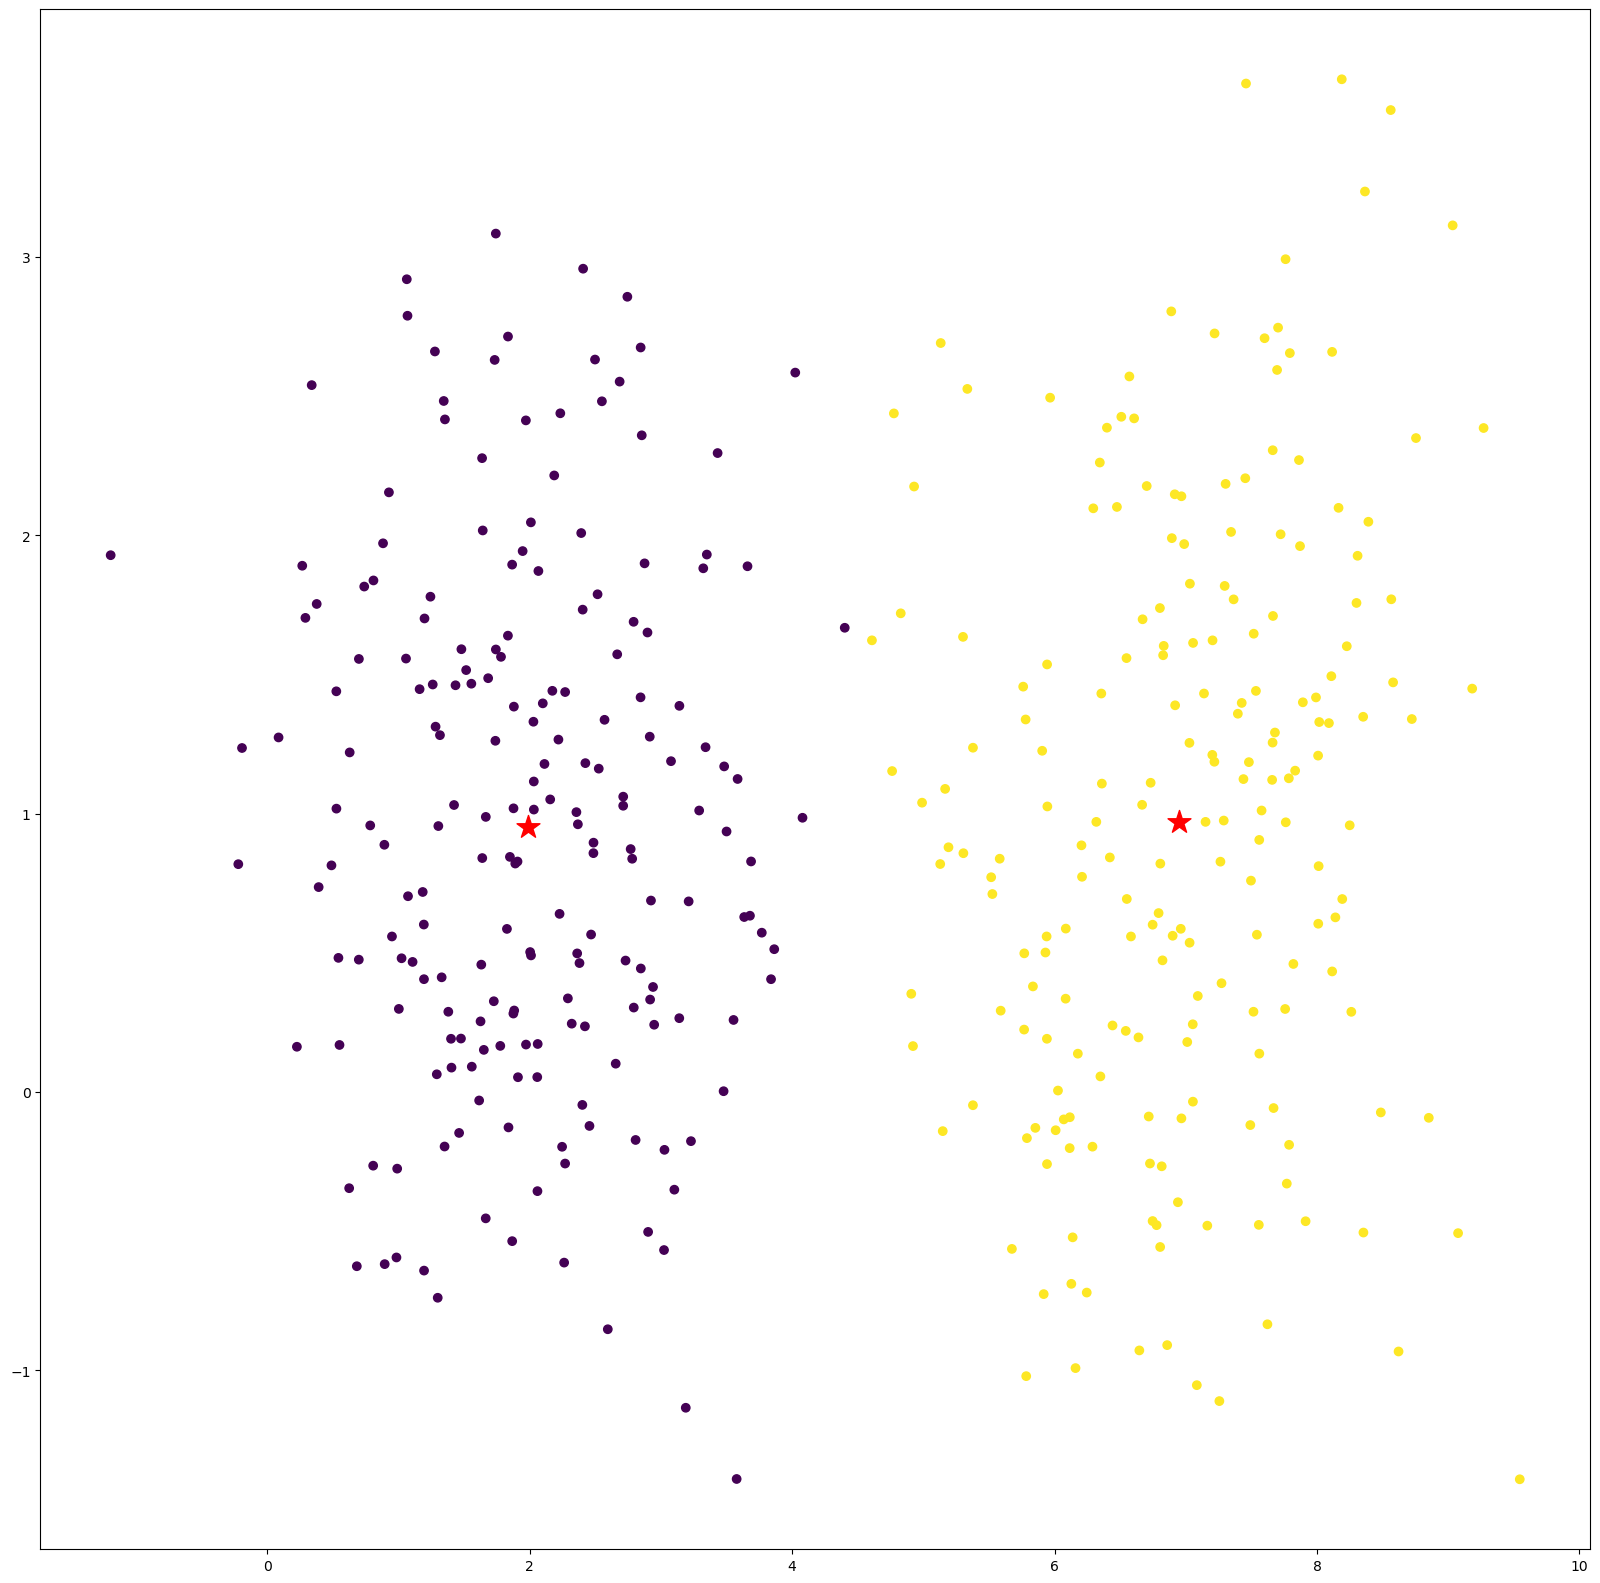

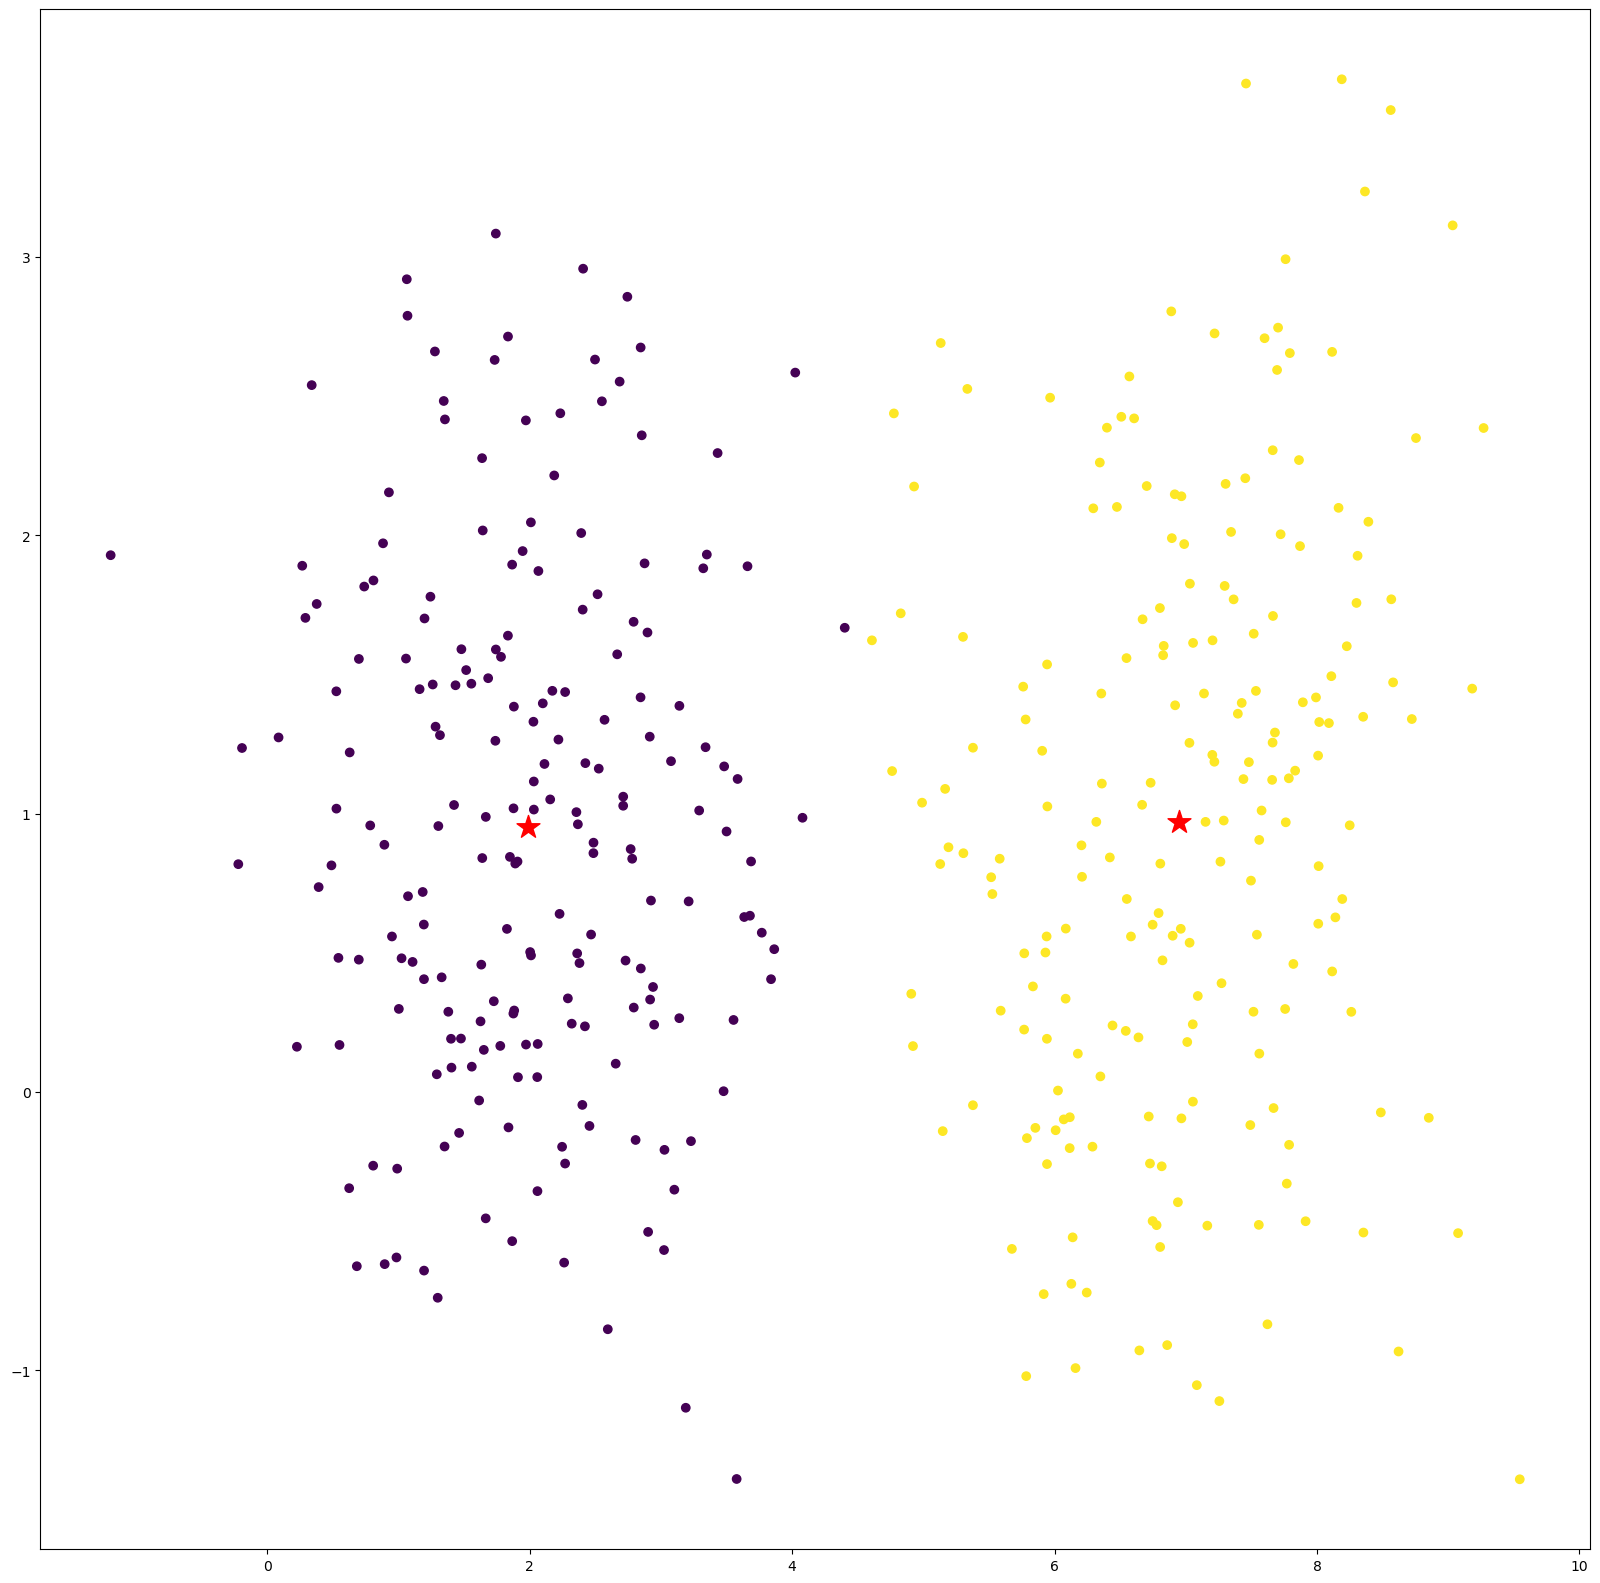

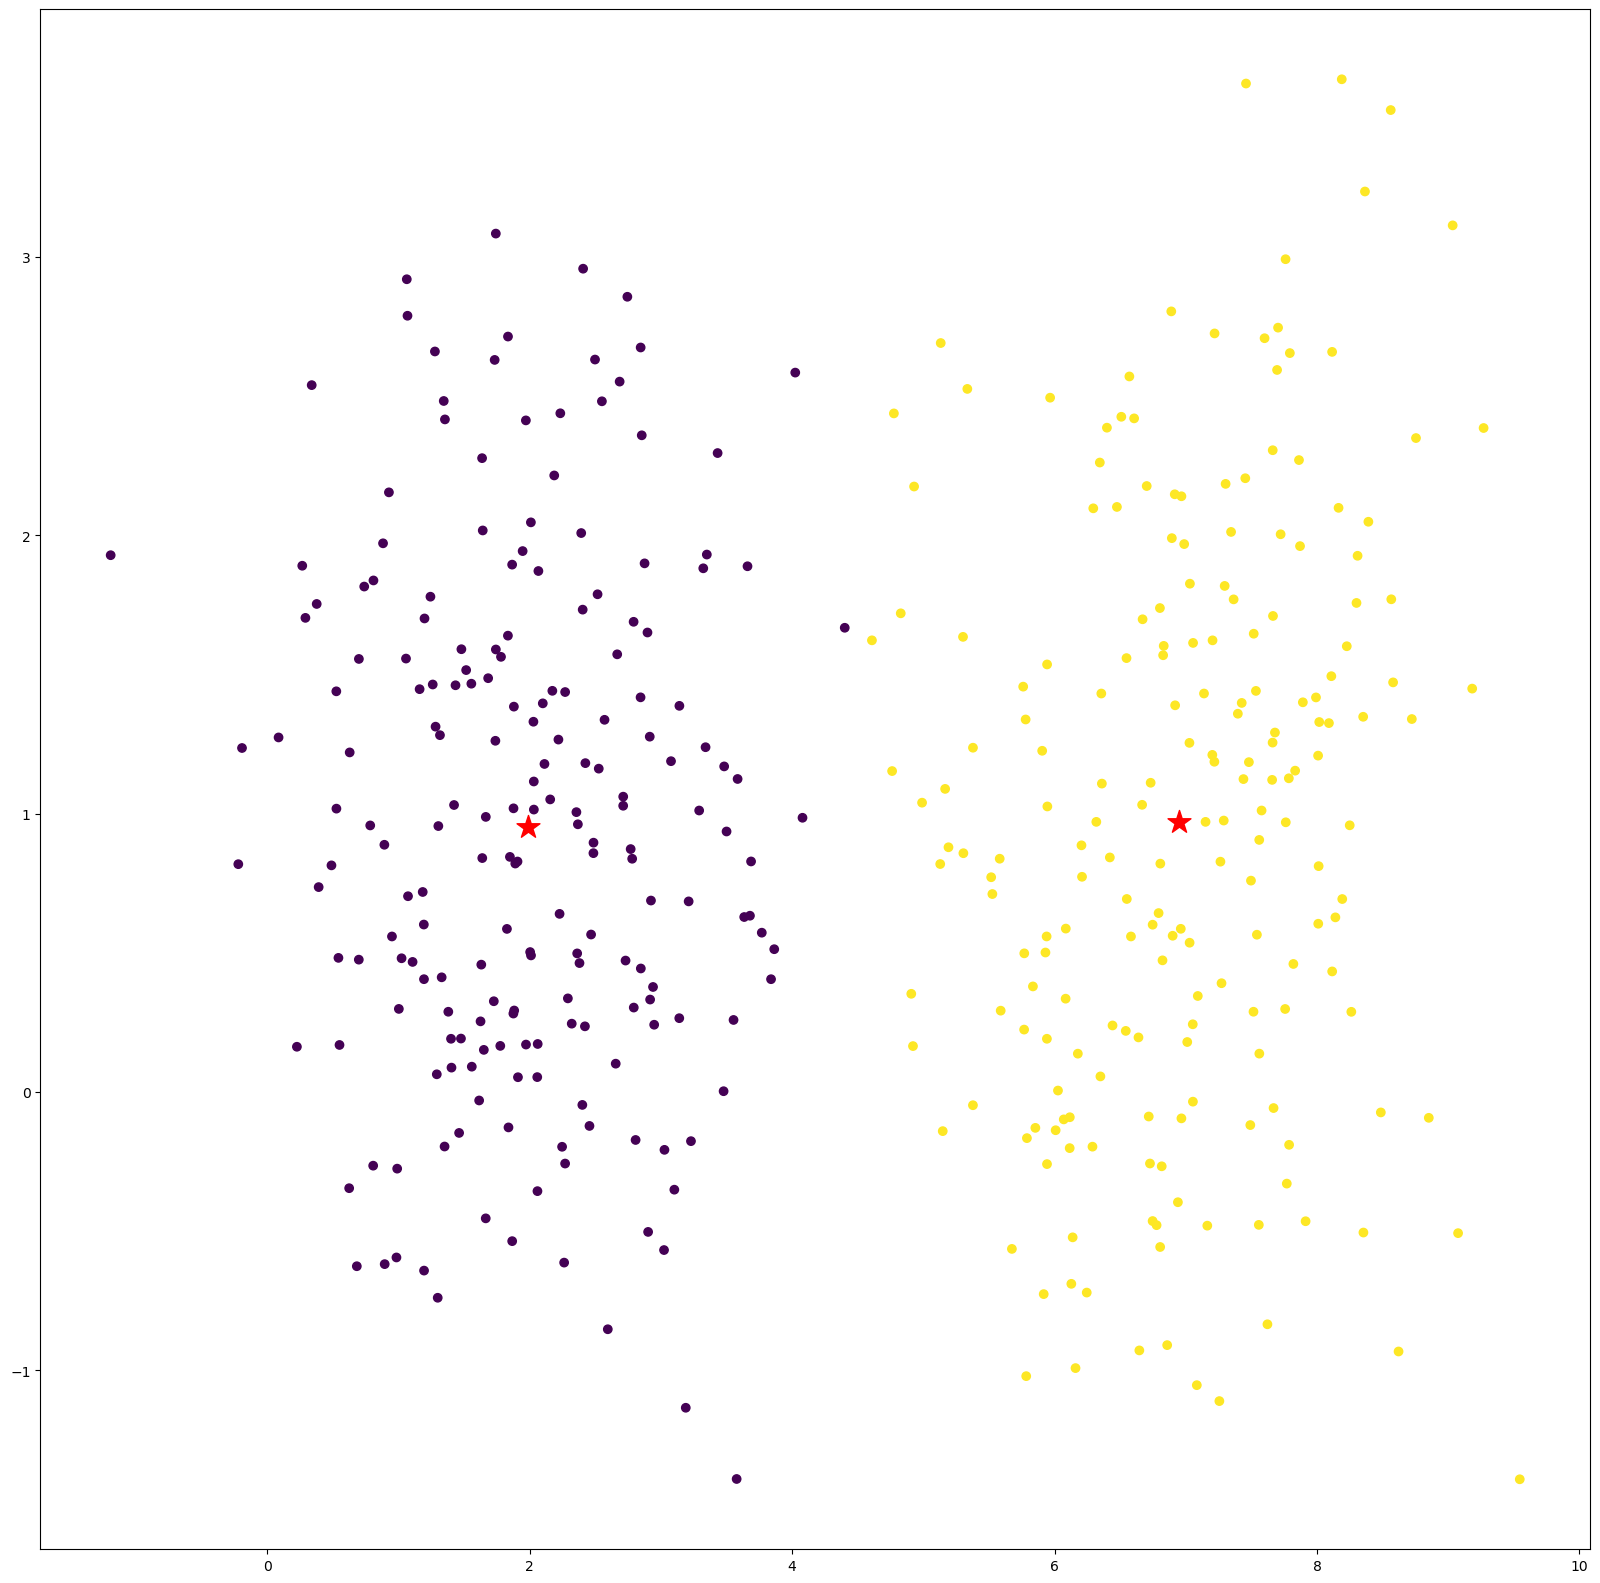

In [206]:
# REPEAT!!!
r2Clusters = sortClusters(data, r1Centroids)
r2Centroids = reassignCentroids(data, r2Clusters, k)
plt.figure(figsize = (PlotSize, PlotSize))
plotData(data, r2Clusters)
plotCentroids(r2Centroids)

r3Clusters = sortClusters(data, r2Centroids)
r3Centroids = reassignCentroids(data, r3Clusters, k)
plt.figure(figsize = (PlotSize, PlotSize))
plotData(data, r3Clusters)
plotCentroids(r3Centroids)

r4Clusters = sortClusters(data, r3Centroids)
r4Centroids = reassignCentroids(data, r3Clusters, k)
plt.figure(figsize = (PlotSize, PlotSize))
plotData(data, r4Clusters)
plotCentroids(r4Centroids)

r5Clusters = sortClusters(data, r4Centroids)
r5Centroids = reassignCentroids(data, r4Clusters, k)
plt.figure(figsize = (PlotSize, PlotSize))
plotData(data, r5Clusters)
plotCentroids(r5Centroids)